# [The Marinexplore and Cornell University Whale Detection Challenge]

- 고래의 서식지에서 안전한 배 운항을 하기 위하여, 소리를 통해 고래를 식별하는 것이 목표.


- 분석을 위하여 Digital Audio 데이터를 불러오고 Spectrogram(음파 스펙트럼의 이미지)를 계산해야 함.


- 데이터 다운로드: https://www.kaggle.com/c/whale-detection-challenge


- 이번 스터디 목표: Digital Audio 및 Spectrogram과 관련한 개념 설명과 함께, Audio 파일을 데이터화하는 것까지 실습.

## Digital Audio and Fourier Analysis Tutorial
Technical background notes for the USF MSAN 630 final project.

Jason Helgren, 12 February 2016

소스코드 출처: https://github.com/jaimeps/whale-sound-classification/blob/master/1_audio_analysis_tutorial/tutorial_audio_analysis.ipynb

###### [Digital Audio와 Spectrogram]

- Audio Recording은 압력 차이를 측정하는 연속적인 Signal.


- Signal의 주파수와 진폭은 우리의 소리 인식을 결정함.

  - 진폭: 파형의 중심에서 최대 높이까지의 길이 또는 최소 길이
  - 주기(period): 하나의 사이클을 완성하는데 필요한 시간( 초 단위 )
    - 한번 진동하는데 걸리는 시간, 한 파장만큼의 거리를 이동하는데 필요한 시간
  - 주파수(frequency):  1초 동안 생성되는 신호 주기의 수
    - 주기의 역수 (주파수=1/주기)


- Digital Audio는 지정된 시간 간격으로 연속적인 파형(waveform, 소리가 일으키는 파동)을 표본화함.
  - 샘플링(Sampling): 연속적인 Signal을 매 초당 몇 개의 점으로 저장할 것인가를 결정하는 것.
  - 샘플주파수, 표본추출률(Sample Frequency, Sampling Rate): 1초를 몇 등분하여 소리의 진폭을 저장할 것인가?
  - (예) Compact disks는 44.1kHz에서 샘플링하는데, 이는 매 초당 44,100개의 샘플이 추출되는 것을 의미.
  - 샘플주파수 높다는 것은, 그 만큼 점을 찍어서 원신호의 정보를 저장하는 것.


- Digital Audio의 표현 방법
  - 파형(waveform): 시간축의 변화에 따른 진폭 축의 변화
  - Spectrum: 주파수 축의 변화에 따른 진폭 축의 변화
    - 진폭, 주파수 도면으로써 복합파를 분석하여 그 복합파가 어떠한 단순파들의 합으로 이루어진 것인가를 보여주는 방법
  - Spectrogram: 시간축과 주파수 축의 변화에 따라 진폭의 차이를 색상으로 표현
    - 파형과 Spectrum의 특징이 조합되어 있음
    
    
- 푸리에 변환 (Fourier transforms)
  - Spectrum 및 Spectrogram은 푸리에 변환을 통해 계산될 수 있음.
  - 음성 등의 파형을 기본 주파수(기본음)와 그 정배수의 각 주파수(각 배음)로 분해하는 것.
  - 즉, 어떤 파(波) 중에서 어느 주파수 성분이 얼마만큼 포함되어 있는지를 계산하는 방법.
  - 모든 주기파는 일정수의 단순파(사인곡선)들의 합으로 표현될 수 있다는 사실을 바탕으로 함 (Fourier, 18세기 프랑스 수학자)
  - 종류
    - 이산 푸리에 변환(Discrete Fourier Transform; DFT)
    - 고속 푸리에 변환(Fast Fourier Transform; FFT)
      - 불연속적인 신호를 빠르게 분석하여 스펙트럼으로 나타내게 될 때 사용되는 방식
    - 역푸리에 변환(푸리에 합성)
      - 기본파와 고주파의 주파수 및 진폭을 알 수 있다면, 이것을 합성해서 하나의 파형으로 나타내는 것


###### [Middle C 예제를 통한 개념 이해]

- 가장 단순한 Audio Signal은 순수 사인 곡선.

- 피아노 건반의 거의 중앙에 위치하고 261.6Hz의 주파수를 가지는 Middle C를 가지고 Digital Audio 관련 개념을 이해해본다.

###### (1) Middle C의 파형(waveform) 생성
- 261.6Hz의 Middle C를 44.1 kHz 샘플주파수로 생성하고 플롯팅.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import rfft # Fourier transforms
from matplotlib import mlab
import pylab as pl

import aifc # Read and write AIFF and AIFC files

In [2]:
def generate_tone(duration, frequency, sampling_rate):
    """ Simulate a digitally recorded pure tone. """
    # Return evenly spaced numbers over a specified interval.
    t = np.linspace(0, duration, duration * sampling_rate)
    waveform = np.sin(2 * frequency * np.pi * t)
    return waveform

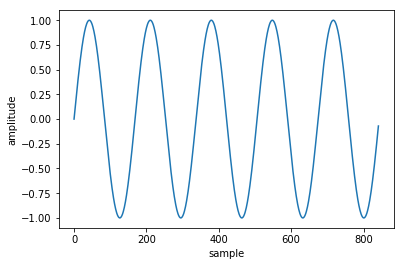

In [3]:
f = 261.6 # set the frequency
d = 2 # simulate a two second audio clip
s = 44100 # 44.1 kHz sampling frequency

middle_c = generate_tone(d, f, s)
# plot a small subset of the tone so we can visualize the waveform
five_cycles = int(s * 5 * 1 / f)
plt.plot(middle_c[0:five_cycles])
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.axis('tight')
plt.show()

###### (2) Spectrum
- 이산 고속 푸리에 변환 (FFT)을 계산하여 신호의 주파수 내용을 표시.

- 예상대로, 약 260Hz에서 단일 주파수 성분을 가지고 있음.

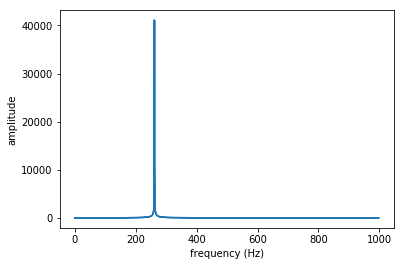

In [4]:
# Compute the one-dimensional discrete Fourier Transform.
middle_c_fft = abs(np.fft.fft(middle_c))
freqs = np.fft.fftfreq(len(middle_c_fft))
freqs_hz = abs(freqs * s)
# limit the results to frequencies less than 1000 Hz for easier visualization.
limit1000 = freqs_hz < 1000

plt.plot(freqs_hz[limit1000], middle_c_fft[limit1000])
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.axis('tight')
plt.show()

###### (3) Spectrogram
- Spectrogram은 시간에 따른 Signal의 주파수 Spectrum의 변화를 나타냄.
- 가로축은 시간을 나타내며 입력 Signal와 동일한 지속 시간을 나타내고, 세로축은 주파수를 나타냄.
- Middle C 예제의 Signal은 시간에 따라 변하지 않으므로, Spectrogram은 약 260Hz에서 수평선을 나타냄.
- mlab.specgram: Plot a spectrogram

In [5]:
params = {'NFFT':1024, 'Fs':s, 'noverlap':0}
P, freqs, bins = mlab.specgram(middle_c, **params)

# Parameter
# NFFT: The number of data points used in each block for the FFT. A power 2 is most efficient.
# Fs: The sampling frequency (samples per time unit).
# noverlap: The number of points of overlap between blocks. The default value is 128.

# Return
# P: periodograms of successive segments. (Spectrogram)
# freqs: The frequencies corresponding to the rows in spectrum.
# bins: The times corresponding to midpoints of segments (i.e., the columns in spectrum).

In [6]:
def PlotSpecgram(P, freqs, bins):
    """Spectrogram"""
    Z = np.flipud(P) # flip rows so that top goes to bottom, bottom to top, etc.
    xextent = 0, np.amax(bins)
    xmin, xmax = xextent
    extent = xmin, xmax, freqs[0], freqs[-1]

    im = pl.imshow(Z, extent=extent)
    pl.axis('auto')
    pl.xlim([0.0, bins[-1]])
    pl.ylim([0, 1000])

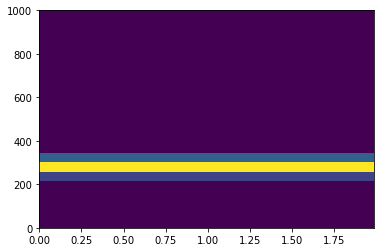

In [7]:
PlotSpecgram(P, freqs, bins)

## TUTORIAL: UNDERSTANDING WHALE/NON-WHALE SOUND SPECTROGRAMS
Author: Jaime Pastor

소스코드 출처: https://github.com/jaimeps/whale-sound-classification/blob/master/2_spectrogram_whale_tutorial/Tutorial_spectrogram_whale_sound.ipynb

###### (1) Whale Sound Data

- Middle C의 예제와는 대조적으로, 전형적인 Audio Signal의 주파수 특성은 시간에 따라 변함.
- Kaggle의 Whale Sound Audio 파일은 고래 호출 및 중요한 백그라운드 노이즈를 기록.
- Audio 파일은 AIFF 형식으로 인코딩.
- Python 표준 라이브러리에는 AIFF로 인코딩 된 파일을 읽는 모듈이 포함되어 있음.
- AIFF 파일은 디지털 샘플을 "프레임"에 기록하며, 각 프레임에는 각 채널의 아날로그 신호 샘플이 존재.
- 고래 녹음은 모노포닉이므로 (동시에 하나의 음만), 각 프레임에는 단일 채널이 포함되어 있습니다.
- 샘플주파수는 2000Hz이며 각 파일에는 4000 개의 샘플이 포함되어 있으므로 각 파일 기록의 지속 시간은 2 초.



In [8]:
# train6.aiff: Whale Sound에 해당하는 레이블의 Audio
whale_sample_file = '/Users/HONG_Mac/Desktop/whale_sound_analysis/train/train6.aiff'
whale_aiff = aifc.open(whale_sample_file,'r')

print("Channels:", whale_aiff.getnchannels()) # Return the number of audio channels (1 for mono, 2 for stereo).
print("Frames:", whale_aiff.getnframes()) # Return the number of audio frames in the file.
print("Frame rate (frames per second):", whale_aiff.getframerate()) # Return the sampling rate.

Channels: 1
Frames: 4000
Frame rate (frames per second): 2000


- AIFF 데이터를 Numpy 배열로 변환하고 Spectrogram 생성.


- 결과 해석: Whale Call은 약 0.5 초 시작하고 약 1 초 동안 지속되며 200Hz에서 400Hz까지 변화함.

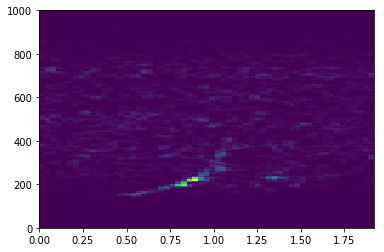

In [9]:
# Read and return the next nframes frames from the audio file.
# The returned data is a string containing for each frame the uncompressed samples of all channels.
whale_strSig = whale_aiff.readframes(whale_aiff.getnframes())

# 1-D array initialized from raw binary or text data in a string.
# Then Swap the bytes of the array elements
whale_array = np.fromstring(whale_strSig, np.short).byteswap()

params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(whale_array, **params)
PlotSpecgram(P, freqs, bins)

###### (2) Examples of whale / non-whale sounds

In [10]:
# Set path to directory with folders train and test
path_data = '/Users/HONG_Mac/Desktop/whale_sound_analysis/'

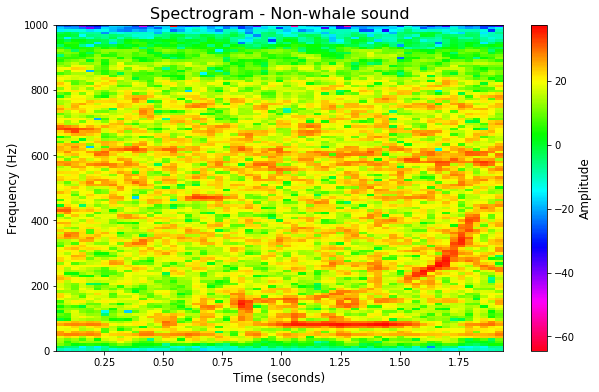

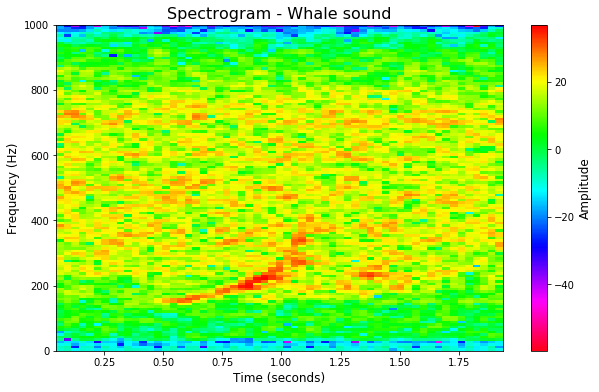

In [11]:
import numpy as np
import aifc
import matplotlib.pyplot as plt
from matplotlib import mlab
import matplotlib
import pandas as pd
%matplotlib inline

# ReadAIFF function
def ReadAIFF(file):
# Reads the frames from the audio clip and returns the uncompressed data
    s = aifc.open(file,'r')
    nFrames = s.getnframes()
    strSig = s.readframes(nFrames)
    return np.fromstring(strSig, np.short).byteswap()

# Plot spectrogram function
def plot_spectrogram(filename, whale_flag):
# Plots a single spectrogram
    sound = ReadAIFF(filename)
    fig = plt.figure(figsize = (10,6))
    ax1 = fig.add_subplot(111)
    # Setting spectrogram parameters
    my_cmap = matplotlib.cm.get_cmap('hsv_r');
    params = {'NFFT':256, 'Fs':2000, 'noverlap':192, 'cmap' : my_cmap}
    plt.specgram(sound, **params);
    title0 = 'Spectrogram - Non-whale sound' if whale_flag == 0 else 'Spectrogram - Whale sound'
    ax1.set_title(title0, fontsize = 16)
    ax1.set_xlabel('Time (seconds)', fontsize = 12)
    ax1.set_ylabel('Frequency (Hz)', fontsize = 12)
    cbar = plt.colorbar()
    cbar.set_label('Amplitude', fontsize = 12)

# Plot non-whale sound    
plot_spectrogram(path_data + 'train/train1.aiff', 0)
# Plot whale sound
plot_spectrogram(path_data + 'train/train6.aiff', 1)

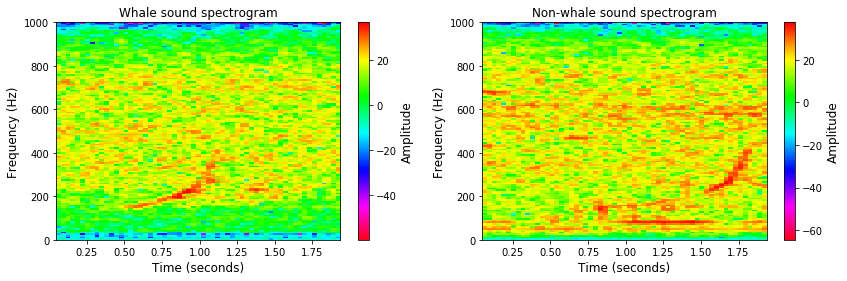

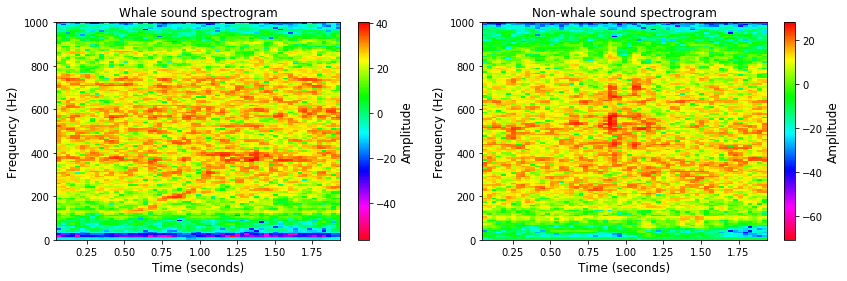

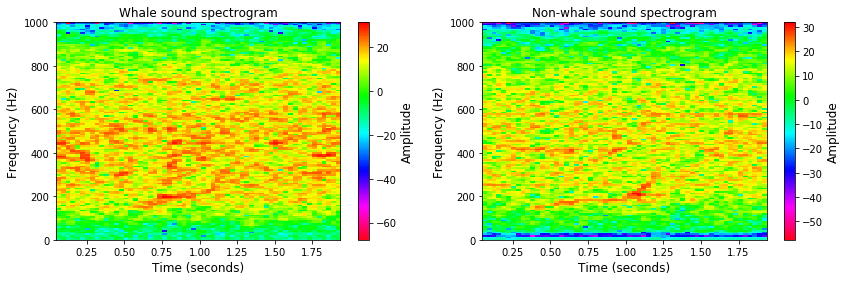

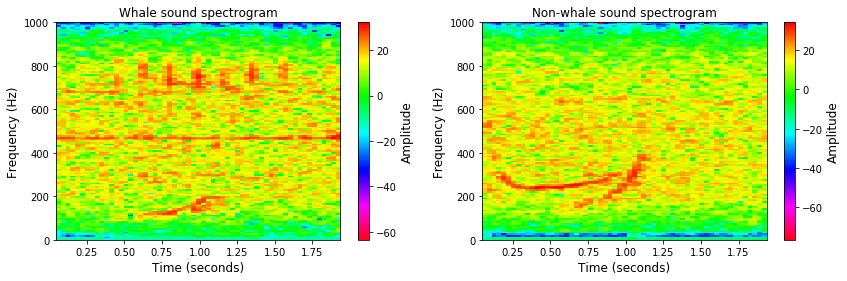

In [12]:
# Plot spectrograms side by side
def plot_sbs_spectrogram(filename_whale, filename_non_whale):
    whale = ReadAIFF(filename_whale)
    nonwhale = ReadAIFF(filename_non_whale)
    plt.figure(figsize = (14,4))
    ax1 = plt.subplot(121)
    my_cmap = matplotlib.cm.get_cmap('hsv_r');
    params = {'NFFT':256, 'Fs':2000, 'noverlap':192, 'cmap' : my_cmap}
    plt.specgram(whale, **params);
    ax1.set_title('Whale sound spectrogram', fontsize = 12)
    ax1.set_xlabel('Time (seconds)', fontsize = 12)
    ax1.set_ylabel('Frequency (Hz)', fontsize = 12)
    cbar = plt.colorbar()
    cbar.set_label('Amplitude', fontsize = 12)
    ax2 = plt.subplot(122)
    plt.specgram(nonwhale, **params);
    ax2.set_title('Non-whale sound spectrogram', fontsize = 12)
    ax2.set_xlabel('Time (seconds)', fontsize = 12)
    ax2.set_ylabel('Frequency (Hz)', fontsize = 12)
    cbar = plt.colorbar()
    cbar.set_label('Amplitude', fontsize = 12)
    plt.show()

# Compare several examples:
plot_sbs_spectrogram(path_data + 'train/train6.aiff', path_data + 'train/train1.aiff')
plot_sbs_spectrogram(path_data + 'train/train7.aiff', path_data + 'train/train2.aiff')
plot_sbs_spectrogram(path_data + 'train/train9.aiff', path_data + 'train/train3.aiff')
plot_sbs_spectrogram(path_data + 'train/train12.aiff', path_data + 'train/train4.aiff')

###### (3) Data components of a spectrogram

In [13]:
# Read the AIFF
s = ReadAIFF(path_data + 'train/train6.aiff')
# Convert to dataframe for illustrative purposes
pd.DataFrame(s).T

# 결과: 2000Hz의 2초 사운드 클립마다 프레임의 채널에서 압축되지 않은 샘플의 4000개 진폭값

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,42,-486,-22,190,-102,-36,0,-45,-194,194,...,-221,-99,523,185,-414,-324,203,219,-155,-32


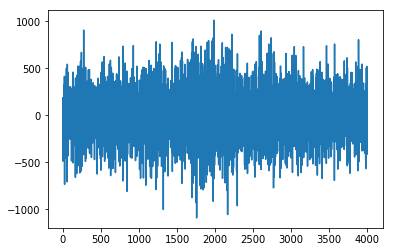

In [14]:
plt.plot(s)

In [15]:
params = {'NFFT':256, 'Fs':2000, 'noverlap':192}
P, freqs, bins = mlab.specgram(s, **params)

# Parameter
# NFFT: The number of data points used in each block for the FFT. A power 2 is most efficient.
# Fs: The sampling frequency (samples per time unit).
# noverlap: The number of points of overlap between blocks. The default value is 128.

# Return
# P: periodograms of successive segments. (Spectrogram)
# freqs: The frequencies corresponding to the rows in spectrum.
# bins: The times corresponding to midpoints of segments (i.e., the columns in spectrum).

* 위의 Spectrogram 생성에서,
  * 데이터는 NFFT 길이의 세그먼트 (이 경우 256)로 분할되고, 각 섹션의 PSD (분해 가능한 피크 사이의 최소 거리)가 계산.
  * windowing 함수가 각 세그먼트에 적용되며 각 세그먼트의 겹침 정도는 noverlap (이 경우 192)으로 지정.
  * P는 129 x 59 배열의 Spectrogram을 출력.

In [16]:
print('Dimensions of P:', P.shape)
print('Dimensions of freqs:', freqs.shape)
print('Dimensions of bins:' , bins.shape)

Dimensions of P: (129, 59)
Dimensions of freqs: (129,)
Dimensions of bins: (59,)


In [17]:
print('Example: Output of spectogram (5 rows of P):')
pd.DataFrame(P)[0:5]

Example: Output of spectogram (5 rows of P):


,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.113351,0.165562,0.059401,0.118447,0.097788,0.044270,0.130254,0.091165,0.066634,0.161218,...,0.108101,0.051158,0.159134,0.108867,0.067750,0.141300,0.055044,0.072392,0.152040,0.077441
1,0.150772,0.209581,0.002119,0.140703,0.145280,0.009410,0.208168,0.080656,0.026659,0.168231,...,0.152628,0.009739,0.217310,0.097863,0.026349,0.195871,0.047690,0.077425,0.212174,0.014284
2,0.073590,0.087053,0.017277,0.048117,0.077449,0.037291,0.083607,0.058673,0.002132,0.062662,...,0.079560,0.048323,0.080580,0.060225,0.015207,0.102985,0.075975,0.038160,0.074104,0.053259
3,0.023100,0.043745,0.036382,0.122513,0.037399,0.000883,0.030144,0.031742,0.009940,0.074564,...,0.010613,0.000033,0.024112,0.054927,0.002194,0.130074,0.038089,0.012735,0.028417,0.048546
4,0.339533,0.000324,0.339389,1.360706,1.250461,0.561532,0.197355,0.077918,0.020356,0.168877,...,0.327348,0.289459,0.152684,0.064283,0.332411,0.836566,0.864631,1.294363,1.535084,1.004250
